# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Carregamento da base X_train.txt
X_train = pd.read_csv('X_train.txt', sep='\s+', header=None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [3]:
#Carregamento da base X_train.txt
X_test = pd.read_csv('X_train.txt', sep='\s+', header=None)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
# Importando base y_train
y_train = pd.read_csv('y_train.txt', header=None)
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [5]:
# Importando base y_test
y_test = pd.read_csv('y_test.txt', header=None)
y_test.head()

,0
0,5
1,5
2,5
3,5
4,5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [6]:
X_, X_test, y_, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=100)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [7]:
#Ajustar a árvore de decisão com max_depth = 4
clf = DecisionTreeClassifier(max_depth = 4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
# Obter as importâncias das variáveis
feature_importances = clf.feature_importances_

# Organizar as variáveis por importância
feature_importances_df = pd.DataFrame({
    'Feature': np.arange(len(feature_importances)),  # Índice das variáveis
    'Importance': feature_importances
})

# Ordenar pelas variáveis mais importantes
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Selecionar as 3 variáveis mais importantes
top_3_features = feature_importances_df.head(3)

print("As 3 variáveis mais importantes são:")
print(top_3_features)

As 3 variáveis mais importantes são:
     Feature  Importance
52        52    0.289370
310      310    0.252129
41        41    0.162658


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [9]:
top_3_features = [52, 310, 41]  

# Selecionar as colunas corretas para treino, validação e teste
X_train_top3 = X_train.iloc[:, top_3_features]
X_test_top3 = X_test.iloc[:, top_3_features]
X_valid_top3 = X_valid.iloc[:, top_3_features]

In [10]:
%%time
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_top3, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: total: 31.2 ms
Wall time: 17.9 ms


In [11]:
ccp_alphas

array([0.00000000e+00, 1.51171580e-04, 1.51171580e-04, 1.81405896e-04,
       1.81405896e-04, 1.88964475e-04, 1.94363460e-04, 1.94363460e-04,
       1.94363460e-04, 1.98412698e-04, 1.98412698e-04, 1.98412698e-04,
       1.98412698e-04, 2.04081633e-04, 2.06143063e-04, 2.06511176e-04,
       2.07860922e-04, 2.07860922e-04, 2.07860922e-04, 2.07860922e-04,
       2.09314495e-04, 2.09314495e-04, 2.10560415e-04, 2.10560415e-04,
       2.11640212e-04, 2.13418701e-04, 2.13418701e-04, 2.14159738e-04,
       2.14822771e-04, 2.16714502e-04, 2.16898354e-04, 2.17501967e-04,
       2.19198791e-04, 2.19885934e-04, 2.20790070e-04, 2.21088435e-04,
       2.21603793e-04, 2.21685165e-04, 2.23083060e-04, 2.23773720e-04,
       2.24089636e-04, 2.25538244e-04, 2.26205649e-04, 2.26757370e-04,
       2.26757370e-04, 2.26757370e-04, 2.26757370e-04, 2.26757370e-04,
       2.26757370e-04, 2.26757370e-04, 2.26757370e-04, 2.28246445e-04,
       2.30356693e-04, 2.41874528e-04, 2.55102041e-04, 2.60519022e-04,
      

In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train_top3, y_train)
    clfs.append(clf)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

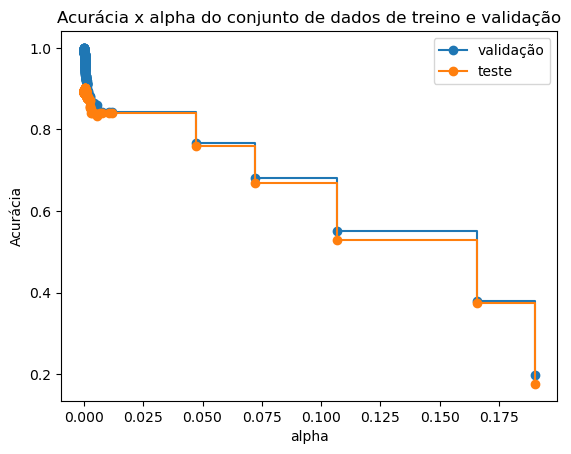

In [13]:
train_scores = [clf.score(X_train_top3, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_top3, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [14]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 90.07


DecisionTreeClassifier(ccp_alpha=0.00044894742767083136, random_state=42)

Acurácia: 90.48


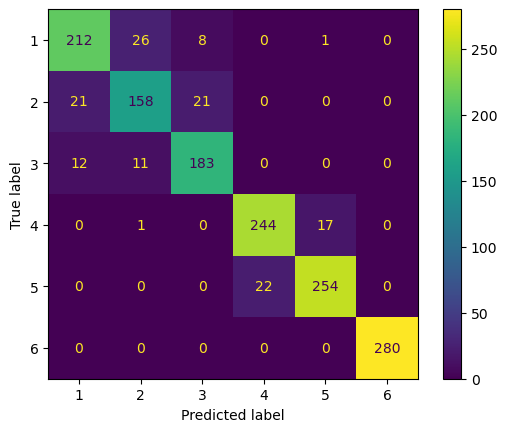

In [15]:
# Previsões do modelo
y_pred = melhor_arvore.predict(X_test_top3)

# Exibir a matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)



acuracia_teste = melhor_arvore.score(X_test_top3, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
